[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.

a) Ethnicity
b) Height
c) Number of seats in a car
d) Water volume

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon_west.head(10)

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

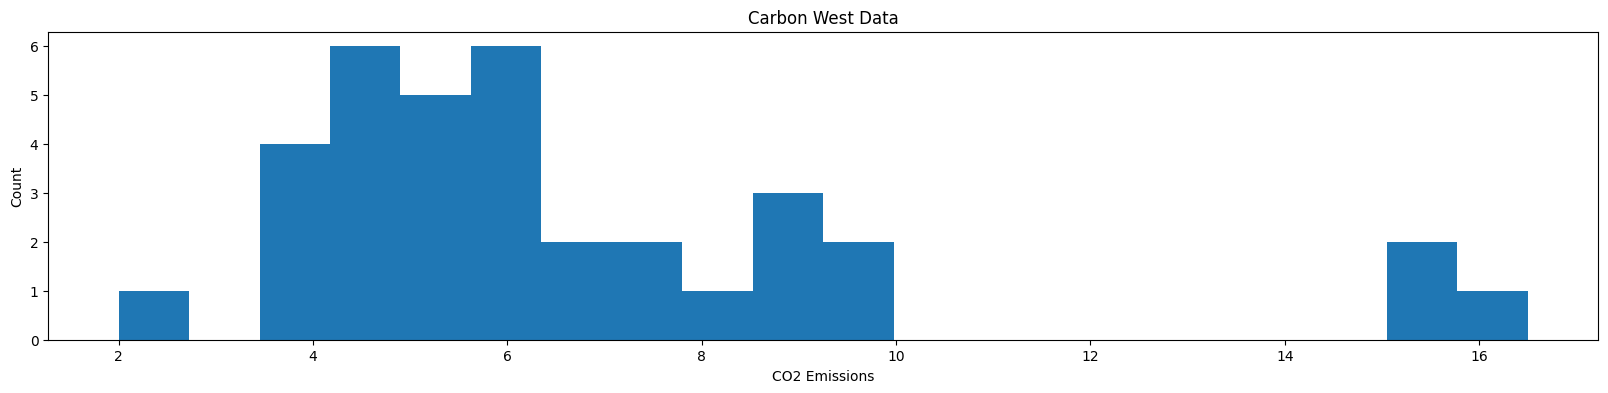

In [66]:
plt.figure(figsize=(20, 4))
plt.title("Carbon West Data")
plt.xlabel("CO2 Emissions")
plt.ylabel("Count")
plt.hist(carbon_west["CO2"], bins=20)

plt.show()

Part b. Find the mean, median, and standard deviation. 

In [67]:
print(f"mean: {np.mean(carbon_west['CO2'])}")
print(f"median: {np.median(carbon_west['CO2'])}")
print(f"std: {np.std(carbon_west['CO2'])}")

mean: 6.717142857142858
median: 5.9
std: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [68]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [69]:
no_dc = murders.drop(murders[murders["state"] == "DC"].index)
print(f"Mean: {np.mean(no_dc['murder'])}")
print(f"Median: {np.median(no_dc['murder'])}")
print(f"Standard Deviation: {np.std(no_dc['murder'])}")

Mean: 4.874
Median: 4.85
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [70]:
print(f"Minimum: {np.min(no_dc['murder'])}")
print(f"Maximum: {np.max(no_dc['murder'])}")
print(f"First Quartile: {np.percentile(no_dc['murder'], 25)}")
print(f"Second Quartile: {np.percentile(no_dc['murder'], 50)}")
print(f"Third Quartile: {np.percentile(no_dc['murder'], 75)}")

Minimum: 1.0
Maximum: 12.4
First Quartile: 2.625
Second Quartile: 4.85
Third Quartile: 6.175


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [78]:
murders.describe()

,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


The mean is more affected by the outlier than the median. The Interquartile range is increased as well, but not nearly as much as the mean was. The range was increased significantly as well.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [82]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home. 

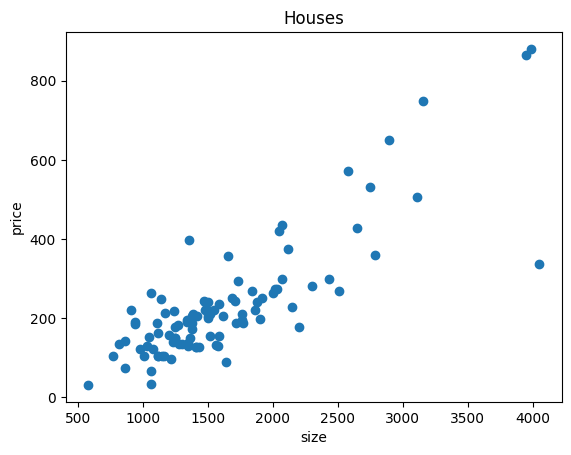

In [83]:
plt.scatter(houses['size'], houses['price'])
plt.title("Houses")
plt.xlabel("size")
plt.ylabel("price")
plt.show()

Part b. Find the correlation between the two variables.

In [88]:
houses['size'].corr(houses['price'])

0.833784788558654

Part c. Find and plot the regression line on top of the scatterplot. 

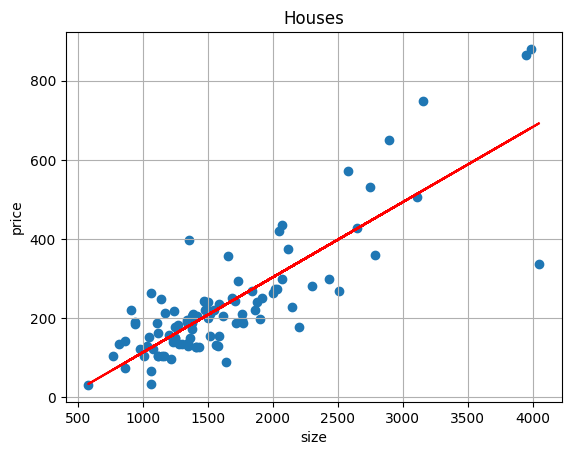

In [92]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x,y)

plt.plot(x, model.predict(x), color='red', label="Linear Regression")

plt.scatter(houses['size'], houses['price'])
plt.title("Houses")
plt.xlabel("size")
plt.ylabel("price")
plt.grid(True)
plt.show()


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

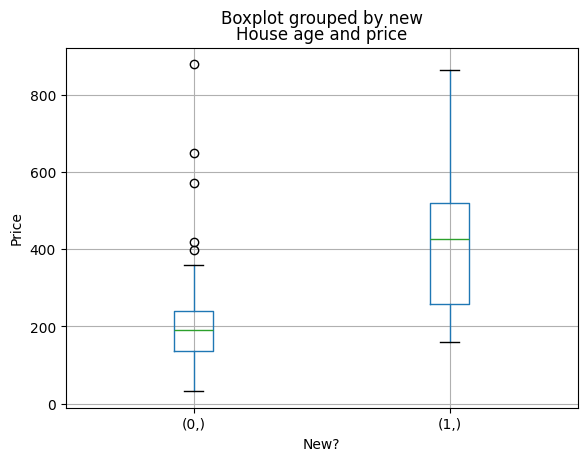

In [93]:
houses.boxplot(column=['price'], by=['new'])
plt.title("House age and price")
plt.xlabel("New?")
plt.ylabel("Price")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Homes that are new are more expensive. According to our boxplot, the interquartile range of a new home is higher enough that it doesn't overlap with the old homes' interquartile range. 

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [3]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [4]:
pd.crosstab(happy['marital'],happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
